In [34]:
from tensorflow.keras.models import load_model, Model
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np
import os
import pickle
import re
import matplotlib.pyplot as plt

In [32]:
from google.colab import drive
drive.mount('/content/drive')

saved_model_path = 'drive/MyDrive/Project/caption_model.h5'
caption_model = load_model(saved_model_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
# Load tokenizer (ensure it's the same as used during training)
with open('tokenize.pkl', 'rb') as f:
    tokenizer = pickle.load(f)

In [27]:
vgg_model = VGG16()
# Remove the last layer to get features directly from the second last layer
vgg_feature_extractor = Model(inputs=vgg_model.input, outputs=vgg_model.layers[-2].output)

553467096/553467096 [==============================] - 6s 0us/step


In [28]:
# Function to preprocess a custom image
def preprocess_image(image_path):
    image = load_img(image_path, target_size=(224, 224))
    image = img_to_array(image)
    image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
    image = preprocess_input(image)
    return image

In [29]:
# Function to generate caption for a custom image
def generate_caption(caption_model, tokenizer, image_features, max_length):
    # Start with the initial input '<start>'
    in_text = '<start>'
    for _ in range(max_length):
        # Encode the input sequence
        sequence = tokenizer.texts_to_sequences([in_text])[0]
        # Pad sequences to fixed length
        sequence = pad_sequences([sequence], maxlen=max_length)
        # Predict the next word
        yhat = caption_model.predict([image_features, sequence], verbose=0)
        yhat = np.argmax(yhat)
        # Map predicted word index to word
        word = word_for_id(yhat, tokenizer)
        if word is None:
            break
        # Append as input for generating the next word
        in_text += ' ' + word
        # Break if the end of the caption is predicted
        if word == '<end>':
            break
    return in_text

In [30]:
# Function to map integer to word
def word_for_id(integer, tokenizer):
    for word, index in tokenizer.word_index.items():
        if index == integer:
            return word
    return None

In [ ]:
from pathlib import Path

import matplotlib as mpl


fpath = Path(mpl.get_data_path(), "fonts/ttf/cmr10.ttf")
mpl.font_manager.fontManager.addfont(str(fpath))
plt.show()

In [121]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img

import matplotlib.font_manager as fm

# Upload the font file
font_path = 'HelloGraduationSans-d9enl.ttf'  # Replace with the name of your uploaded font file

# Add the font to Matplotlib's font manager
font_prop = fm.FontProperties(fname=font_path)

# Add the font to Matplotlib's font manager
font_prop = fm.FontProperties(fname=font_path)
# Set the custom font globally
plt.rcParams['font.family'] = font_prop.get_name()
plt.rcParams['font.size'] = 50  # Increase font size

def plot_image_caption(image_path, caption):
    # Load and plot image
    image = load_img(image_path)
    plt.imshow(image)
    plt.axis('off')

    # Format caption
    caption = caption.replace('<start>', '').replace('<end>', '')


    # Use the custom font for the title and increase font size
    plt.title(caption, loc='center', wrap=True, fontproperties=font_prop)
    plt.show()

In [146]:
if __name__ == "__main__":
    # Maximum length of the generated captions
    maximum_length = 15
def generate(image_path):

    # Preprocess and predict captions for a custom image
    image_path = image_path  # Replace with your image path
    custom_image = preprocess_image(image_path)
    image_features = vgg_feature_extractor.predict(custom_image, verbose=0)
    caption = generate_caption(caption_model, tokenizer, image_features, maximum_length)

    plot_image_caption(image_path, caption)

Saving 118309463_a532b75be9.jpg to 118309463_a532b75be9.jpg


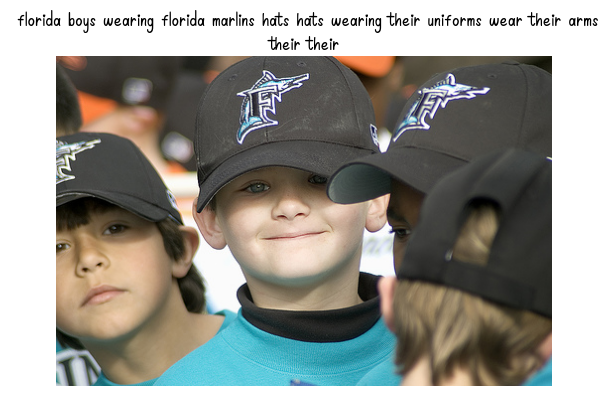

In [155]:
from google.colab import files
uploaded = files.upload()

# Assuming you upload only one image, get its file name
image_path = next(iter(uploaded.keys()))

generate(image_path)

Saving 69189650_6687da7280.jpg to 69189650_6687da7280.jpg


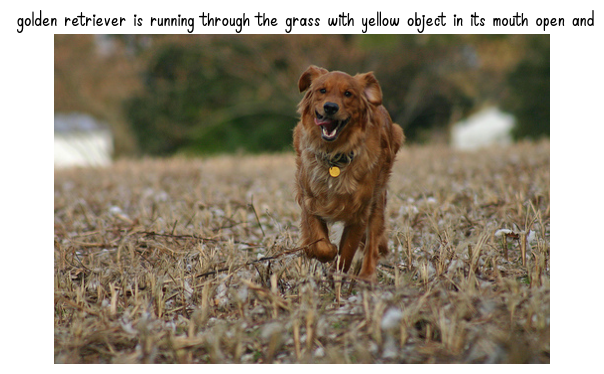

In [152]:
from google.colab import files
uploaded = files.upload()

# Assuming you upload only one image, get its file name
image_path = next(iter(uploaded.keys()))

generate(image_path)

Saving 3048461682_e89f81b1c7.jpg to 3048461682_e89f81b1c7.jpg


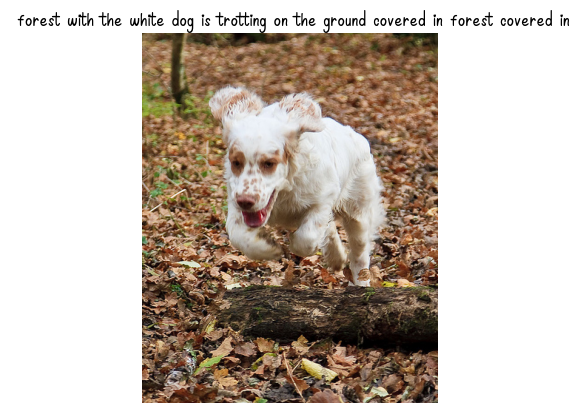

In [159]:
from google.colab import files
uploaded = files.upload()

# Assuming you upload only one image, get its file name
image_path = next(iter(uploaded.keys()))

generate(image_path)

Saving 44856031_0d82c2c7d1.jpg to 44856031_0d82c2c7d1 (1).jpg


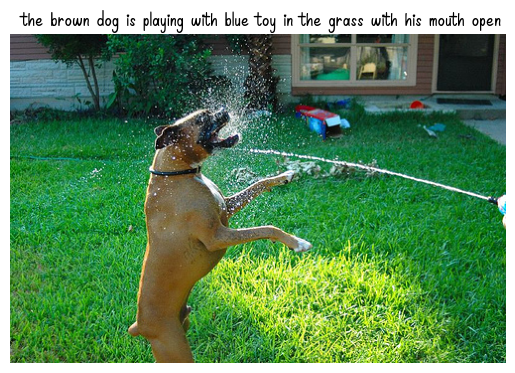

In [147]:
from google.colab import files
uploaded = files.upload()

# Assuming you upload only one image, get its file name
image_path = next(iter(uploaded.keys()))

generate(image_path)

Saving 166321294_4a5e68535f.jpg to 166321294_4a5e68535f.jpg


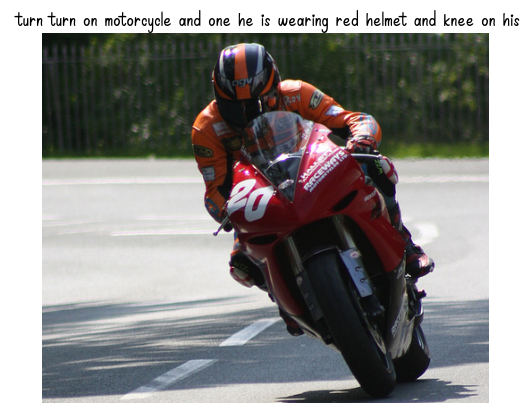

In [148]:
from google.colab import files
uploaded = files.upload()

# Assuming you upload only one image, get its file name
image_path = next(iter(uploaded.keys()))

generate(image_path)

Saving 106490881_5a2dd9b7bd.jpg to 106490881_5a2dd9b7bd.jpg


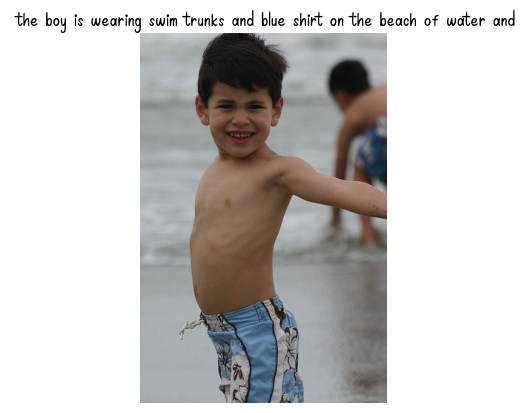

In [150]:
from google.colab import files
uploaded = files.upload()

# Assuming you upload only one image, get its file name
image_path = next(iter(uploaded.keys()))

generate(image_path)

Saving 216172386_9ac5356dae.jpg to 216172386_9ac5356dae.jpg


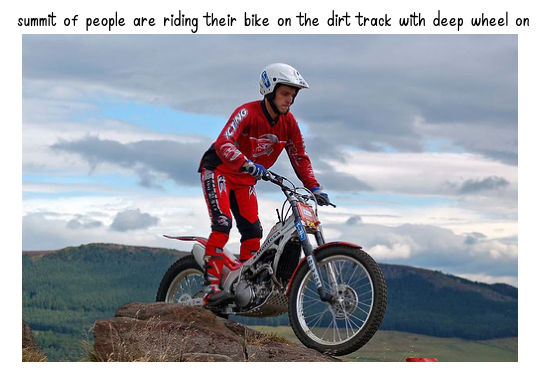

In [151]:
from google.colab import files
uploaded = files.upload()

# Assuming you upload only one image, get its file name
image_path = next(iter(uploaded.keys()))

generate(image_path)

Saving 3751594676_edfbfa0688.jpg to 3751594676_edfbfa0688.jpg


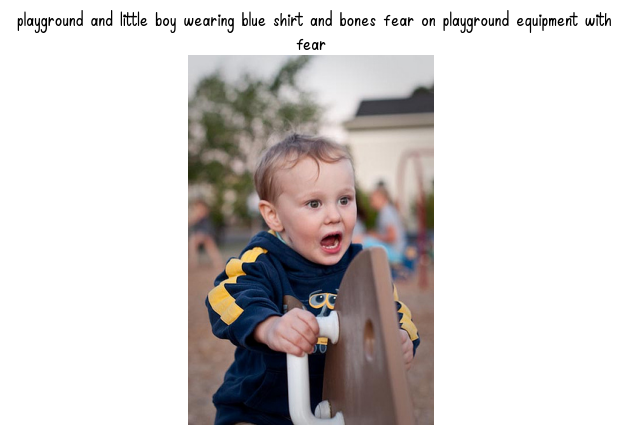

In [161]:
from google.colab import files
uploaded = files.upload()

# Assuming you upload only one image, get its file name
image_path = next(iter(uploaded.keys()))

generate(image_path)

Saving 3147913471_322ea231d9.jpg to 3147913471_322ea231d9.jpg


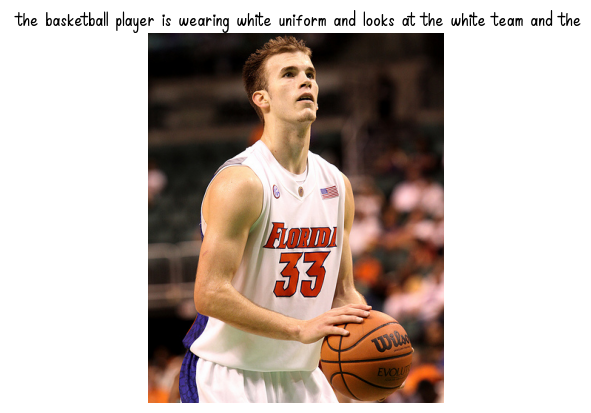

In [164]:
from google.colab import files
uploaded = files.upload()

# Assuming you upload only one image, get its file name
image_path = next(iter(uploaded.keys()))

generate(image_path)

Saving 172092461_a9a9762e13.jpg to 172092461_a9a9762e13.jpg


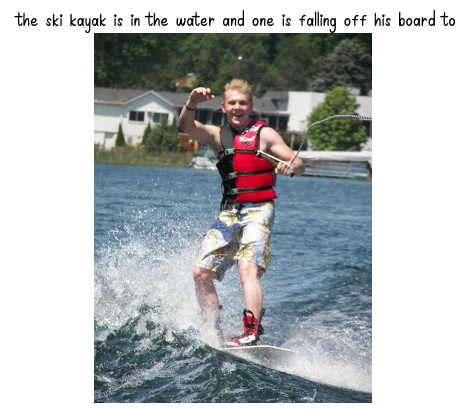

In [176]:
from google.colab import files
uploaded = files.upload()

# Assuming you upload only one image, get its file name
image_path = next(iter(uploaded.keys()))

generate(image_path)

Saving 20141121-afp-MaithripalaSirisena.jpg to 20141121-afp-MaithripalaSirisena (4).jpg


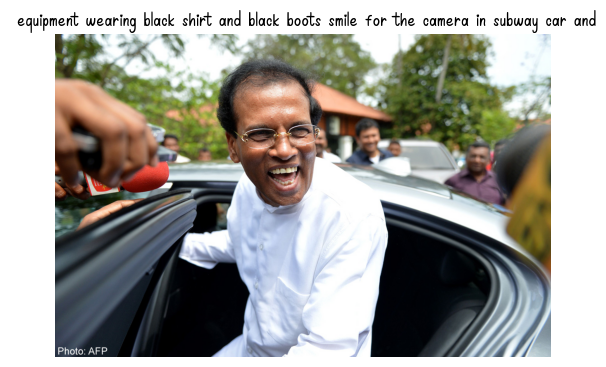

In [177]:
from google.colab import files
uploaded = files.upload()

# Assuming you upload only one image, get its file name
image_path = next(iter(uploaded.keys()))

generate(image_path)